#

#Import Library

In [ ]:
import numpy as np
import pandas as pd
import zipfile
import matplotlib.pyplot as plt
import os

from sklearn.metrics import classification_report, confusion_matrix
from sklearn import metrics
from sklearn.metrics import f1_score, confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import itertools
import tensorflow as tf


#Loading Data


###Dataset Description

Dataset contains 157 individuals with the following attributes :

*   Gender - ('Female', 'Male', 'Prefer not to say') - (1, 0, 2)

*   Are you above 30 years of age? -(No, Yes) - (0, 1)

*   How are you feeling today? - ('Fine', 'Good', 'Sad', 'Depressed') - (0, 1, 2, 3)

*   Is your sadness momentarily or has it been constant for a long time? - ('For some time', 'Significant time', 'Not sad', 'Long time') - (1, 2, 0, 3)

*   At what time of the day are you extremely low? - ('Evening', 'Morning', 'Afternoon') - (2, 0, 1)

*   How frequently have you had little pleasure or interest in the activities you usually enjoy? - ('Very Often', 'Sometimes', 'Never', 'Often') - (3, 1, 0, 2)
*   How confident you have been feeling in your capabilities recently. - (1, 2, 3, 4, 5)


*   Describe how ‘supported’ you feel by others around you – your friends, family, or otherwise. - ('Highly supportive', 'Little bit', 'Satisfactory', 'Not at all') - (0, 2, 1, 3)


*   How frequently have you been doing things that mean something to you or your life?  -('Sometimes', 'Never', 'Often', 'Very Often') - (2, 3, 1, 0)


*   How easy is it for you to take medical leave for a mental health condition? - ('Not so easy', 'Very easy', 'Difficult', 'Easy') - (2, 0, 3, 1)


*   How often do you make use of substance abuse(e.g. smoking, alcohol)? - ('Never', 'Often', 'Sometimes', 'Very Often') - (0, 2, 1, 3)


*  How many hours do you spend per day on watching mobile phone, laptop, computer, television, etc.? - ('2-5 hours', 'More than 10 hours', '5-10 hours', '1-2 hours') - (1, 3, 2, 0)

*   If sad, how likely are you to take an appointment with a psychologist or a counsellor for your current mental state? - (1,  2,  3,  4,  5)

*   How often do you get offended or angry or start crying ? - (Sometimes, Often, Very often, Never) - (1, 2, 3, 0) 

*   How likely do you feel yourself vulnerable or lonely? - (1, 2, 3, 4, 5)

*   How comfortable are you in talking about your mental health? - (1, 2, 3, 4, 5)







In [ ]:
!pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# %cd /content/gdrive/MyDrive/

#Download Dataset From Kaggle


In [ ]:
# ! (ls ~/.kaggle 2>/dev/null || mkdir ~/.kaggle)

In [ ]:
# from google.colab import files
# files.upload() #upload kaggle.json

# !pip install -q kaggle
# !mkdir -p ~/.kaggle
# !cp kaggle.json ~/.kaggle/
# !ls ~/.kaggle
# !chmod 600 /root/.kaggle/kaggle.json

# !kaggle kernels list — user  — sort-by dateRun

# !kaggle competitions download -c DATASET

# !unzip -q train.csv.zip -d .
# !unzip -q test.csv.zip -d .
# !ls

In [ ]:
# from google.colab import files
# files.upload() #upload kaggle.json


# # Change file permission
# ! chmod 600 kaggle.json 
# # Check or make kaggle folder
# ! (ls ~/.kaggle 2>/dev/null || mkdir ~/.kaggle)
# # Move kaggle.json to kaggle folder
# ! mv kaggle.json ~/.kaggle/ && echo 'Done'
# # Download dataset from kaggle
# ! kaggle datasets download -d heal-yourself-mental-health-prediction-2022

# # unzipping/extract data .zip
# # file_zip = 'early-stage-symptoms-of-covid19-patients.zip'
# # with zipfile.ZipFile(file_zip) as zip_file:
# #     zip_file.extractall('./sars-cov-2/')
# file_zip = 'heal-yourself-mental-health-prediction-2022.zip'
# zip_ref = zipfile.ZipFile(file_zip, 'r')
# zip_ref.extractall('./mental-health/')
# zip_ref.close()
# print(os.listdir('./mental-health/'))


# #kaggle kernels output sureddyakshay/heal-yourself-mental-health-prediction-2022 -p /path/to/dest

#Download Dataset From Google Drive

In [ ]:
url = 'https://drive.google.com/file/d/1rroo8QFnRiLr8is_hQXiJWKTuB3swTBQ/view?usp=sharing'

In [ ]:
id = url.split('d/')[1].split('/view?')[0]
print (id)

1rroo8QFnRiLr8is_hQXiJWKTuB3swTBQ


In [ ]:
# Use this to download easily (only on google colab)
!gdown --id 1rroo8QFnRiLr8is_hQXiJWKTuB3swTBQ

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1rroo8QFnRiLr8is_hQXiJWKTuB3swTBQ
To: /content/Mental Health Questionnaire 2.0.csv
100% 43.2k/43.2k [00:00<00:00, 64.0MB/s]


In [ ]:
# df = pd.read_csv(url)
# df.head()

#Download Data Locally

In [ ]:
#url = 'https://drive.google.com/file/d/1rroo8QFnRiLr8is_hQXiJWKTuB3swTBQ/view?usp=sharing'
df = pd.read_csv('Mental Health Questionnaire 2.0.csv')

#Exploratory Data Analysis


In [ ]:
df.head(10)

,Timestamp,Email address,Name,Gender,Are you above 30 years of age?,Employment Status,City,How are you feeling today?,eating and sleeping,(If sad)have you been in the same mental state for the past few days?,...,"Having trouble concentrating on things, such as reading the newspaper or watching television, or studying?",Do you feel bad about yourself — or that you are a failure or have let yourself or your family down?,"How many hours do you spend per day on watching mobile phone, laptop, computer, television, etc.?","If sad, how likely are you to take an appointment with a psychologist or a counsellor for your current mental state?",Has the COVID-19 pandemic affected your mental well being?,How often do you get offended or angry or start crying ?,How likely do you feel yourself vulnerable or lonely?,How comfortable are you in talking about your mental health?,Prediction,Prediction_status
0,09-12-2021 23:54,riyaaditi2@gmail.com,Aditi Harsh,Female,No,Student,Tier 3 (Other cities/towns),Fine,Yes,No,...,No,No,NaN,NaN,NaN,NaN,NaN,NaN,36,Yes
1,10-12-2021 08:40,imcrazyashutosh@gmail.com,Ashutosh Kumar,Male,No,Student,Tier 2 (Capital cities Eg. Lucknow ),Fine,No,Yes,...,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN,33,No
2,10-12-2021 21:48,atharv23srivastava@gmail.com,Atharv srivastava,Male,No,Student,"Tier 1 (Delhi, Mumbai, Bangalore, Chennai, Kol...",Fine,No,Maybe,...,Maybe,Maybe,More than 10 hours,1.0,Yes,Sometimes,2.0,NaN,34,No
3,10-12-2021 21:50,ritulricha22@gmail.com,Rimi,Female,No,Student,Tier 3 (Other cities/towns),Fine,No,Maybe,...,Yes,Yes,2-5 hours,1.0,Yes,Often,4.0,NaN,35,Yes
4,10-12-2021 21:55,nisha18054@gmail.com,Jaya singh,Female,No,Student,Tier 2 (Capital cities Eg. Lucknow ),Good,Yes,No,...,No,No,5-10 hours,1.0,Not sure,Sometimes,4.0,NaN,33,No
5,10-12-2021 21:58,ritulricha22@gmail.com,Rimi,Female,No,Student,Tier 3 (Other cities/towns),Fine,No,Maybe,...,Yes,Yes,2-5 hours,4.0,Yes,Sometimes,4.0,NaN,36,Yes
6,10-12-2021 21:58,yushraubaid67@gmail.com,Yushra,Female,No,Student,Tier 3 (Other cities/towns),Sad,No,Maybe,...,No,Yes,2-5 hours,1.0,No,Very often,4.0,NaN,37,Yes
7,10-12-2021 21:59,shaheenultimatekhan@gmail.com,Aaisha,Female,No,Student,Tier 3 (Other cities/towns),Sad,Maybe,Yes,...,Yes,Maybe,5-10 hours,1.0,Not sure,Very often,3.0,NaN,37,Yes
8,10-12-2021 22:04,babitasingh1323@gmail.com,Samridhi,Female,No,Student,Tier 3 (Other cities/towns),Fine,No,No,...,Yes,Yes,2-5 hours,1.0,Yes,Very often,3.0,NaN,38,Yes
9,10-12-2021 22:05,24shreyasrivastava@gmail.com,Shreya Srivastava,Female,No,Unemployed,Tier 3 (Other cities/towns),Fine,No,Yes,...,Yes,No,2-5 hours,3.0,Yes,Very often,3.0,NaN,36,Yes


In [ ]:
df.describe()

,How confident you have been feeling in your capabilities recently.,"If sad, how likely are you to take an appointment with a psychologist or a counsellor for your current mental state?",How likely do you feel yourself vulnerable or lonely?,How comfortable are you in talking about your mental health?,Prediction
count,158.000000,150.000000,155.000000,116.000000,158.000000
mean,3.417722,2.206667,2.929032,3.956897,34.879747
std,1.216737,1.401326,1.339266,1.189755,4.211536
min,1.000000,1.000000,1.000000,1.000000,26.000000
25%,3.000000,1.000000,2.000000,3.000000,32.000000
50%,3.500000,1.500000,3.000000,4.000000,35.000000
75%,4.000000,3.000000,4.000000,5.000000,38.000000
max,5.000000,5.000000,5.000000,5.000000,45.000000


###Check for empty atributes


In [ ]:
df.isna().sum()

Timestamp                                                                                                                0
Email address                                                                                                            0
Name                                                                                                                     0
Gender                                                                                                                   0
Are you above 30 years of age?                                                                                           0
Employment Status                                                                                                        0
City                                                                                                                     0
How are you feeling today?                                                                                               0
eating and sleep

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 32 columns):
 #   Column                                                                                                                Non-Null Count  Dtype  
---  ------                                                                                                                --------------  -----  
 0   Timestamp                                                                                                             158 non-null    object 
 1   Email address                                                                                                         158 non-null    object 
 2   Name                                                                                                                  158 non-null    object 
 3   Gender                                                                                                                158 non-null    object 
 4   Are you 

In [ ]:
#Check Number of rows and columns
print('Row: ', df.shape[0])
print('Columns: ', df.shape[1])

Row:  158
Columns:  32


#Checking For Duplicate and Imbalance Data

In [ ]:
print("Duplicated Data: ", df.duplicated().sum())

Duplicated Data:  0


In [ ]:
import seaborn as sad

# sns.countplot(df)
# print(df.value_counts())

#Visualize the data

In [ ]:
df['Prediction_status'].unique()

array(['Yes', 'No'], dtype=object)

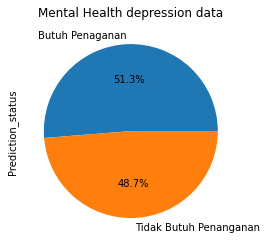

In [ ]:
target = df['Prediction_status'].value_counts()
label =['Butuh Penaganan', 'Tidak Butuh Penanganan']
target.plot(kind='pie', labels=label, autopct='%1.1f%%')
plt.title('Mental Health depression data')
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  This is separate from the ipykernel package so we can avoid doing imports until


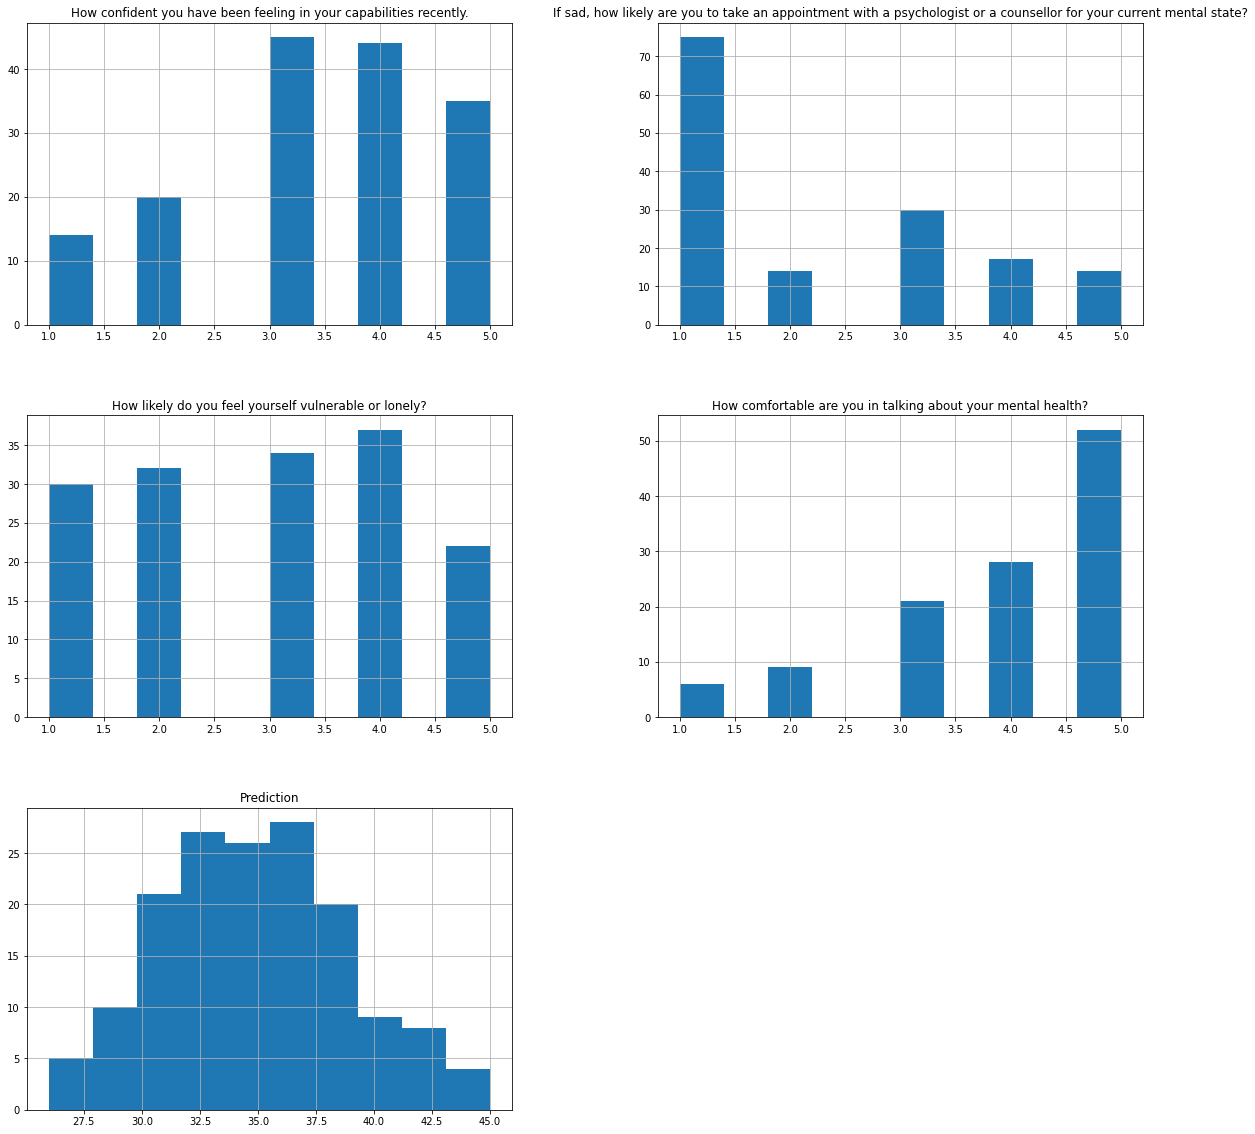

In [ ]:
fig = plt.figure(figsize=(20, 20))
axs = fig.add_subplot()
df.hist(ax=axs);

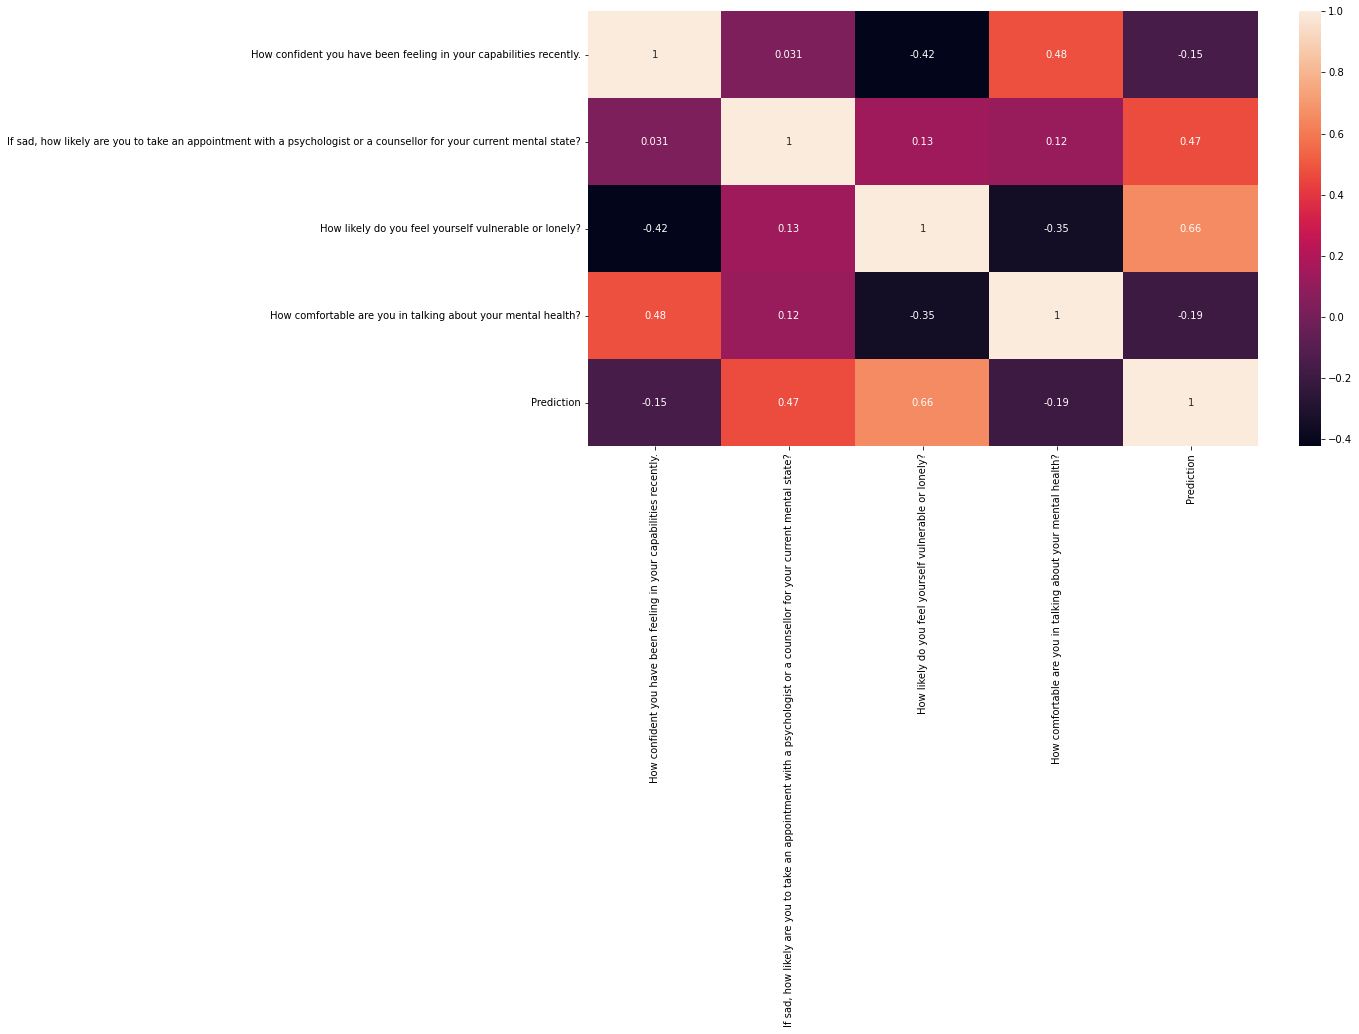

In [ ]:
import seaborn as sns
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(), annot=True)

#Preprocessing

---



data cleaning

##-- FIlling Empty Atributes with most appearing data

In [ ]:
df['How likely do you feel yourself vulnerable or lonely?'].unique()

array([nan,  2.,  4.,  3.,  1.,  5.])

In [ ]:
df['How likely do you feel yourself vulnerable or lonely?'].mode()

0    4.0
dtype: float64

In [ ]:
df['How likely do you feel yourself vulnerable or lonely?'] = df['How likely do you feel yourself vulnerable or lonely?'].fillna(4.0)

In [ ]:
df['How likely do you feel yourself vulnerable or lonely?'] = df['How likely do you feel yourself vulnerable or lonely?'].astype(int)

In [ ]:
df['How often do you get offended or angry or start crying ?'].mode()

0    Sometimes
dtype: object

In [ ]:
df['How often do you get offended or angry or start crying ?'] = df['How often do you get offended or angry or start crying ?'].fillna('Sometimes')

In [ ]:
df['Has the COVID-19 pandemic affected your mental well being?'].unique()

array([nan, 'Yes', 'Not sure', 'No'], dtype=object)

In [ ]:
df['Has the COVID-19 pandemic affected your mental well being?'].mode()

0    Yes
dtype: object

In [ ]:
df['Has the COVID-19 pandemic affected your mental well being?'] = df['Has the COVID-19 pandemic affected your mental well being?'].fillna('Yes')

In [ ]:
df['How many hours do you spend per day on watching mobile phone, laptop, computer, television, etc.?'].unique()

array([nan, 'More than 10 hours', '2-5 hours', '5-10 hours', '1-2 hours'],
      dtype=object)

In [ ]:
df['How many hours do you spend per day on watching mobile phone, laptop, computer, television, etc.?'].mode()

0    2-5 hours
dtype: object

In [ ]:
df['How many hours do you spend per day on watching mobile phone, laptop, computer, television, etc.?'] = df['How many hours do you spend per day on watching mobile phone, laptop, computer, television, etc.?'].fillna('2-5 hours')

In [ ]:
df['If sad, how likely are you to take an appointment with a psychologist or a counsellor for your current mental state?'].unique()

array([nan,  1.,  4.,  3.,  2.,  5.])

In [ ]:
df['If sad, how likely are you to take an appointment with a psychologist or a counsellor for your current mental state?'].mode()

0    1.0
dtype: float64

In [ ]:
df['If sad, how likely are you to take an appointment with a psychologist or a counsellor for your current mental state?'] = df['If sad, how likely are you to take an appointment with a psychologist or a counsellor for your current mental state?'].fillna(1.0)

In [ ]:
df['If sad, how likely are you to take an appointment with a psychologist or a counsellor for your current mental state?'] = df['If sad, how likely are you to take an appointment with a psychologist or a counsellor for your current mental state?'].astype(int)

In [ ]:
df['(If sad)have you been in the same mental state for the past few days?'].unique()

array(['No', 'Yes', 'Maybe', nan], dtype=object)

In [ ]:
df['(If sad)have you been in the same mental state for the past few days?'].mode()

0    No
dtype: object

In [ ]:
df['(If sad)have you been in the same mental state for the past few days?']=df['(If sad)have you been in the same mental state for the past few days?'].fillna('No')

In [ ]:
df['Have you taken any therapy or medication in the near past for mental health?'].unique()

array(['No', 'Maybe', 'Yes', nan], dtype=object)

In [ ]:
df['Have you taken any therapy or medication in the near past for mental health?'].mode()

0    No
dtype: object

In [ ]:
df['Have you taken any therapy or medication in the near past for mental health?'] = df['Have you taken any therapy or medication in the near past for mental health?'].fillna('No')

In [ ]:
df['How comfortable are you in talking about your mental health?'].unique()

array([nan,  1.,  4.,  2.,  5.,  3.])

In [ ]:
df['How comfortable are you in talking about your mental health?'].mode()

0    5.0
dtype: float64

In [ ]:
df['How comfortable are you in talking about your mental health?']=df['How comfortable are you in talking about your mental health?'].fillna(5.0)

In [ ]:
df['How comfortable are you in talking about your mental health?'] = df['How comfortable are you in talking about your mental health?'].astype(int)

In [ ]:
df['At what time of the day are you extremely low?'].unique()

array(['Evening', 'Morning', 'Afternoon'], dtype=object)

In [ ]:
df['Do you feel bad about yourself — or that you are a failure or have let yourself or your family down?'].unique()

array(['No', 'Yes', 'Maybe', nan], dtype=object)

In [ ]:
df['Do you feel bad about yourself — or that you are a failure or have let yourself or your family down?'].mode()

0    No
dtype: object

In [ ]:
df['Do you feel bad about yourself — or that you are a failure or have let yourself or your family down?'] = df['Do you feel bad about yourself — or that you are a failure or have let yourself or your family down?'].fillna('No')

In [ ]:
df.isna().sum()

Timestamp                                                                                                               0
Email address                                                                                                           0
Name                                                                                                                    0
Gender                                                                                                                  0
Are you above 30 years of age?                                                                                          0
Employment Status                                                                                                       0
City                                                                                                                    0
How are you feeling today?                                                                                              0
eating and sleeping     

In [ ]:
dfnorm = df

####Drop Unused Column

In [ ]:
dfnorm = dfnorm.drop(['Timestamp','Name','Email address','City','Employment Status'],axis = 1)

In [ ]:
dfnorm.head()

,Gender,Are you above 30 years of age?,How are you feeling today?,eating and sleeping,(If sad)have you been in the same mental state for the past few days?,Is your sadness momentarily or has it been constant for a long time?,At what time of the day are you extremely low?,Has there been a sudden and huge change in your life?,Your stress is related to which of the following areas?,How frequently have you had little pleasure or interest in the activities you usually enjoy?,...,"Having trouble concentrating on things, such as reading the newspaper or watching television, or studying?",Do you feel bad about yourself — or that you are a failure or have let yourself or your family down?,"How many hours do you spend per day on watching mobile phone, laptop, computer, television, etc.?","If sad, how likely are you to take an appointment with a psychologist or a counsellor for your current mental state?",Has the COVID-19 pandemic affected your mental well being?,How often do you get offended or angry or start crying ?,How likely do you feel yourself vulnerable or lonely?,How comfortable are you in talking about your mental health?,Prediction,Prediction_status
0,Female,No,Fine,Yes,No,For some time,Evening,No,Personal,Very Often,...,No,No,2-5 hours,1,Yes,Sometimes,4,5,36,Yes
1,Male,No,Fine,No,Yes,For some time,Morning,Yes,Personal,Sometimes,...,Yes,Yes,2-5 hours,1,Yes,Sometimes,4,5,33,No
2,Male,No,Fine,No,Maybe,Significant time,Evening,No,Personal,Never,...,Maybe,Maybe,More than 10 hours,1,Yes,Sometimes,2,5,34,No
3,Female,No,Fine,No,Maybe,Significant time,Evening,Not sure,"Home, Work, Personal",Sometimes,...,Yes,Yes,2-5 hours,1,Yes,Often,4,5,35,Yes
4,Female,No,Good,Yes,No,Not sad,Afternoon,Yes,Personal,Very Often,...,No,No,5-10 hours,1,Not sure,Sometimes,4,5,33,No


##-- Featuring and Labeling




---



In [ ]:
#Labeling for Gender
def gender_labelizing(gender):
  if gender == 'Male':
    return 0
  elif gender =='Female':
    return 1
  else:
    return 2

dfnorm['Gender'] = dfnorm['Gender'].apply(gender_labelizing)

In [ ]:
dfnorm['Gender'].unique()

array([1, 0, 2])

In [ ]:
#Labeling for Prediction
def prediction_labelizing(prediction):
  if prediction == 'Yes':
    return 0
  elif prediction =='No':
    return 1

dfnorm['Prediction_status'] = dfnorm['Prediction_status'].apply(prediction_labelizing)

In [ ]:
dfnorm['Prediction_status'].unique()

array([0, 1])

#-- Spitting features and label

In [ ]:
x='Prediction_status'
binary_features=[
    'Are you above 30 years of age?'
]
ordinal_features=[
    'How are you feeling today?',
    'Is your sadness momentarily or has it been constant for a long time?',
    'At what time of the day are you extremely low?',
    'How frequently have you had little pleasure or interest in the activities you usually enjoy?',
    'Describe how ‘supported’ you feel by others around you – your friends, family, or otherwise.',
    'How frequently have you been doing things that mean something to you or your life?',
    'How easy is it for you to take medical leave for a mental health condition?',
    'How often do you make use of substance abuse(e.g. smoking, alcohol)?',
    'How many hours do you spend per day on watching mobile phone, laptop, computer, television, etc.?',
    'How often do you get offended or angry or start crying ?'
]
     
nominal_features=[
    'eating and sleeping',
    '(If sad)have you been in the same mental state for the past few days?',
    'Has there been a sudden and huge change in your life?',
    'Your stress is related to which of the following areas?',
    'If you have a mental health condition, do you feel that it interferes with your work?',
    'Have you taken any therapy or medication in the near past for mental health?',
    'Having trouble concentrating on things, such as reading the newspaper or watching television, or studying?',
    'Do you feel bad about yourself — or that you are a failure or have let yourself or your family down?',
    'Has the COVID-19 pandemic affected your mental well being?'
]

###--Encoding

In [ ]:
def binary_encode(dflabel,columns,positive_values):
    for column,positive_value in zip(columns,positive_values):
        dflabel[column]=dflabel[column].apply(lambda x: 1 if x==positive_value else 0)
    return dflabel

def ordinal_encode(dflabel,columns,orderings):
    for column,ordering in zip(columns,orderings):
            dflabel[column]=dflabel[column].apply(lambda x:ordering.index(x))
    return dflabel
    
def nominal_encode(dflabel,columns,prefixes):
    for column,prefix in zip(columns,prefixes):
        dummies=pd.get_dummies(dflabel[column],prefix)
        dflabel=pd.concat([dflabel, dummies],axis=1)
        dflabel=dflabel.drop(column,axis=1)
    return dflabel

In [ ]:
binary_positive_values = ['Yes' for feature in binary_features]
ordinal_orderings=[
    ['Good','Fine','Sad','Depressed'],
    ['Not sad','For some time','Significant time','Long time'],
    ['Morning','Afternoon','Evening'],
    ['Never','Sometimes','Often','Very Often'],
    ['Highly supportive','Satisfactory','Little bit','Not at all'],
    ['Very Often','Often','Sometimes','Never'],
    ['Very easy','Easy','Not so easy','Difficult'],
    ['Never','Sometimes','Often','Very Often'],
    ['1-2 hours','2-5 hours','5-10 hours','More than 10 hours'],
    ['Never','Sometimes','Often','Very often']
]

nominal_prefixes=[
    'es',
    'smen',
    'change',
    'stress',
    'inter',
    'ther',
    'conc',
    'fbad',
    'cov'
]

In [ ]:
dfnorm = binary_encode(
    dfnorm,
    columns=binary_features,
    positive_values=binary_positive_values
)
dfnorm=nominal_encode(
    dfnorm,
    columns=nominal_features,
    prefixes=nominal_prefixes
)
dfnorm=ordinal_encode(
    dfnorm,
    columns=ordinal_features,
    orderings=ordinal_orderings
)

In [ ]:
dfnorm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 61 columns):
 #   Column                                                                                                                Non-Null Count  Dtype
---  ------                                                                                                                --------------  -----
 0   Gender                                                                                                                158 non-null    int64
 1   Are you above 30 years of age?                                                                                        158 non-null    int64
 2   How are you feeling today?                                                                                            158 non-null    int64
 3   Is your sadness momentarily or has it been constant for a long time?                                                  158 non-null    int64
 4   At what time of the 

#--Drop Atributes

In [ ]:
features = dfnorm.drop(columns=['Prediction_status'])

In [ ]:
features = features.drop(['es_Maybe', 'es_No','es_Yes','smen_Maybe','smen_No','smen_Yes','change_No','change_Not sure','change_Yes','stress_Financial',
         'stress_Financial, Personal','stress_Home','stress_Home, Financial','stress_Home, Financial','stress_Home, Financial, Personal',
         'stress_Home, Personal','stress_Home, Work','stress_Home, Work, Financial','stress_Home, Work, Financial, Personal',
         'stress_Home, Work, Financial, Personal, None','stress_Home, Work, Personal','stress_Home, Work, Personal, None',
         'stress_None','stress_Personal','stress_Personal, None','stress_Work','stress_Work, Financial','stress_Work, Financial, Personal',
         'stress_Home, Work, Personal','stress_Home, Work, Personal, None','stress_None','stress_Personal','stress_Personal, None',
         'stress_Work','stress_Work, Financial','stress_Work, Financial, Personal','stress_Work, Personal','inter_Maybe',
         'inter_No','inter_Yes','ther_Maybe','ther_No','ther_Yes','conc_Maybe','conc_No','conc_Yes','fbad_Maybe',
         'fbad_No','fbad_Yes','cov_No','cov_Not sure','cov_Yes','Prediction'], axis = 1)

In [ ]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 16 columns):
 #   Column                                                                                                                Non-Null Count  Dtype
---  ------                                                                                                                --------------  -----
 0   Gender                                                                                                                158 non-null    int64
 1   Are you above 30 years of age?                                                                                        158 non-null    int64
 2   How are you feeling today?                                                                                            158 non-null    int64
 3   Is your sadness momentarily or has it been constant for a long time?                                                  158 non-null    int64
 4   At what time of the 

In [ ]:
# features = features.drop(['Prediction'], axis = 1)

In [ ]:
features

,Gender,Are you above 30 years of age?,How are you feeling today?,Is your sadness momentarily or has it been constant for a long time?,At what time of the day are you extremely low?,How frequently have you had little pleasure or interest in the activities you usually enjoy?,How confident you have been feeling in your capabilities recently.,"Describe how ‘supported’ you feel by others around you – your friends, family, or otherwise.",How frequently have you been doing things that mean something to you or your life?,How easy is it for you to take medical leave for a mental health condition?,"How often do you make use of substance abuse(e.g. smoking, alcohol)?","How many hours do you spend per day on watching mobile phone, laptop, computer, television, etc.?","If sad, how likely are you to take an appointment with a psychologist or a counsellor for your current mental state?",How often do you get offended or angry or start crying ?,How likely do you feel yourself vulnerable or lonely?,How comfortable are you in talking about your mental health?
0,1,0,1,1,2,3,4,0,2,2,0,1,1,1,4,5
1,0,0,1,1,0,1,2,2,2,2,0,1,1,1,4,5
2,0,0,1,2,2,0,2,2,3,0,0,3,1,1,2,5
3,1,0,1,2,2,1,2,1,2,2,0,1,1,2,4,5
4,1,0,0,0,1,3,3,1,1,2,0,2,1,1,4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153,0,1,0,3,2,2,5,1,1,2,2,1,4,1,4,4
154,0,1,0,2,2,2,5,0,1,1,0,1,1,2,1,5
155,2,0,3,0,0,0,1,3,0,3,3,3,5,3,5,5
156,0,0,1,0,2,0,5,3,3,0,0,1,5,0,5,5


In [ ]:
pd.set_option("max_rows", None)
features

,Gender,Are you above 30 years of age?,How are you feeling today?,Is your sadness momentarily or has it been constant for a long time?,At what time of the day are you extremely low?,How frequently have you had little pleasure or interest in the activities you usually enjoy?,How confident you have been feeling in your capabilities recently.,"Describe how ‘supported’ you feel by others around you – your friends, family, or otherwise.",How frequently have you been doing things that mean something to you or your life?,How easy is it for you to take medical leave for a mental health condition?,"How often do you make use of substance abuse(e.g. smoking, alcohol)?","How many hours do you spend per day on watching mobile phone, laptop, computer, television, etc.?","If sad, how likely are you to take an appointment with a psychologist or a counsellor for your current mental state?",How often do you get offended or angry or start crying ?,How likely do you feel yourself vulnerable or lonely?,How comfortable are you in talking about your mental health?
0,1,0,1,1,2,3,4,0,2,2,0,1,1,1,4,5
1,0,0,1,1,0,1,2,2,2,2,0,1,1,1,4,5
2,0,0,1,2,2,0,2,2,3,0,0,3,1,1,2,5
3,1,0,1,2,2,1,2,1,2,2,0,1,1,2,4,5
4,1,0,0,0,1,3,3,1,1,2,0,2,1,1,4,5
5,1,0,1,2,2,1,1,1,2,2,0,1,4,1,4,5
6,1,0,2,1,1,1,2,1,3,3,0,1,1,3,4,5
7,1,0,2,1,1,2,3,1,2,2,0,2,1,3,3,5
8,1,0,1,2,2,1,3,2,2,3,0,1,1,3,3,5
9,1,0,1,1,0,2,3,2,2,1,0,1,3,3,3,5


In [ ]:
label = dfnorm[['Prediction_status']]
print(features.shape)
print(label.shape)

features.columns, label.columns

(158, 16)
(158, 1)


(Index(['Gender', 'Are you above 30 years of age?',
        'How are you feeling today?',
        'Is your sadness momentarily or has it been constant for a long time?',
        'At what time of the day are you extremely low?',
        'How frequently have you had little pleasure or interest in the activities you usually enjoy?',
        'How confident you have been feeling in your capabilities recently.',
        'Describe how ‘supported’ you feel by others around you – your friends, family, or otherwise.',
        'How frequently have you been doing things that mean something to you or your life?',
        'How easy is it for you to take medical leave for a mental health condition?',
        'How often do you make use of substance abuse(e.g. smoking, alcohol)?',
        'How many hours do you spend per day on watching mobile phone, laptop, computer, television, etc.?',
        'If sad, how likely are you to take an appointment with a psychologist or a counsellor for your current ment

In [ ]:
col_cat_features = ['Gender','Are you above 30 years of age?', 'How are you feeling today?', 'Is your sadness momentarily or has it been constant for a long time?', 'At what time of the day are you extremely low?',
                    'How frequently have you had little pleasure or interest in the activities you usually enjoy?', 'How confident you have been feeling in your capabilities recently.', 'Describe how ‘supported’ you feel by others around you – your friends, family, or otherwise.',
                    'How frequently have you been doing things that mean something to you or your life?', 'How easy is it for you to take medical leave for a mental health condition?', 'How often do you make use of substance abuse(e.g. smoking, alcohol)?',
                    'How many hours do you spend per day on watching mobile phone, laptop, computer, television, etc.?', 'If sad, how likely are you to take an appointment with a psychologist or a counsellor for your current mental state?',
                    'How often do you get offended or angry or start crying ?', 'How likely do you feel yourself vulnerable or lonely?', 'How comfortable are you in talking about your mental health?']

features[col_cat_features] = features[col_cat_features].astype('category')


In [ ]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 16 columns):
 #   Column                                                                                                                Non-Null Count  Dtype   
---  ------                                                                                                                --------------  -----   
 0   Gender                                                                                                                158 non-null    category
 1   Are you above 30 years of age?                                                                                        158 non-null    category
 2   How are you feeling today?                                                                                            158 non-null    category
 3   Is your sadness momentarily or has it been constant for a long time?                                                  158 non-null    category
 4   At

In [ ]:
label_types = ['Butuh Pertolongan', 'Tidak Butuh Pertolongan']

#--One hot encode

In [ ]:
# features_cat = pd.get_dummies(features[col_cat_features])
# features = pd.concat([features, features_cat], axis = 1)
# features = features.drop(columns = col_cat_features)
# features.head()

#--Split Data

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_validate, y_train, y_validate = train_test_split(
    features, label, test_size=0.3, shuffle=True, stratify=label)

In [ ]:
X_train.shape, X_validate.shape

((110, 16), (48, 16))

In [ ]:
y_train.count(), y_validate.count()

(Prediction_status    110
 dtype: int64, Prediction_status    48
 dtype: int64)

In [ ]:
unique, counts = np.unique(y_train, return_counts=True)
print("y_train")
for i in range(2):
  print(label_types[i])
  print(unique[i], "- - - -", counts[i])

y_train
Butuh Pertolongan
0 - - - - 56
Tidak Butuh Pertolongan
1 - - - - 54


#Modeling Data


---

Train the model

In [ ]:
# input_shape=(features.columns.size,)
# print(input_shape)

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation="relu", input_shape=(features.columns.size,)),
    tf.keras.layers.Dense(64, activation=tf.nn.relu),
    tf.keras.layers.Dense(32, activation=tf.nn.relu),
    tf.keras.layers.Dense(1, activation="sigmoid")
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               2176      
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 1)                 33        
                                                                 
Total params: 12,545
Trainable params: 12,545
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# model = tf.keras.Sequential([
#     tf.keras.layers.Dense(512, activation="relu", input_shape=(features.columns.size,)),
#     tf.keras.layers.Dense(256, activation=tf.nn.relu),
#     tf.keras.layers.Dense(128, activation=tf.nn.relu),
#     tf.keras.layers.Dense(64, activation=tf.nn.relu),
#     tf.keras.layers.Dense(32, activation=tf.nn.relu),\
#     tf.keras.layers.Dense(1, activation="sigmoid")
# ])



Compile model

In [ ]:
model.compile(
    loss='binary_crossentropy',
    optimizer='Adam',
    metrics=['accuracy']
)

In [ ]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.90 and logs.get('val_accuracy')>0.90):
      self.model.stop_training = True
      print("\nThe accuracy of the training set and the validation set has reached > 95%!")
callbacks = myCallback()

In [ ]:
history = model.fit(
    X_train, 
    y_train, 
    validation_data=(X_validate, y_validate), 
    epochs=50, 
    batch_size=len(X_train), 
    callbacks=[callbacks], 
    verbose=1
)

history.history['accuracy'][-1]

Epoch 1/50
1/1 [==============================] - 1s 1s/step - loss: 0.8247 - accuracy: 0.5091 - val_loss: 0.7461 - val_accuracy: 0.5208
Epoch 2/50
1/1 [==============================] - 0s 27ms/step - loss: 0.7299 - accuracy: 0.5091 - val_loss: 0.7011 - val_accuracy: 0.5208
Epoch 3/50
1/1 [==============================] - 0s 32ms/step - loss: 0.6776 - accuracy: 0.5091 - val_loss: 0.6829 - val_accuracy: 0.4583
Epoch 4/50
1/1 [==============================] - 0s 31ms/step - loss: 0.6541 - accuracy: 0.5636 - val_loss: 0.6774 - val_accuracy: 0.5833
Epoch 5/50
1/1 [==============================] - 0s 31ms/step - loss: 0.6435 - accuracy: 0.6545 - val_loss: 0.6739 - val_accuracy: 0.5833
Epoch 6/50
1/1 [==============================] - 0s 30ms/step - loss: 0.6326 - accuracy: 0.6455 - val_loss: 0.6661 - val_accuracy: 0.5417
Epoch 7/50
1/1 [==============================] - 0s 29ms/step - loss: 0.6172 - accuracy: 0.6727 - val_loss: 0.6528 - val_accuracy: 0.6042
Epoch 8/50
1/1 [=============

0.8727272748947144

In [ ]:
_, train_acc = model.evaluate(X_train, y_train, verbose=0)
_, valid_acc = model.evaluate(X_validate, y_validate, verbose=0)
print('Train acc: %.2f, Valid acc: %.2f' % (train_acc, valid_acc))

Train acc: 0.88, Valid acc: 0.77


#Plotting Result


---
Accuration


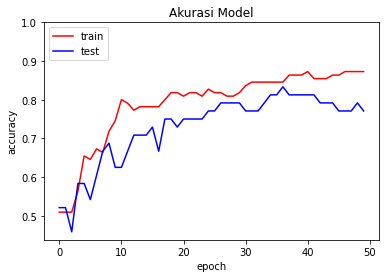

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], color='red')
plt.plot(history.history['val_accuracy'], color='blue')
plt.ylim(top=1)
plt.title('Akurasi Model')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Loss

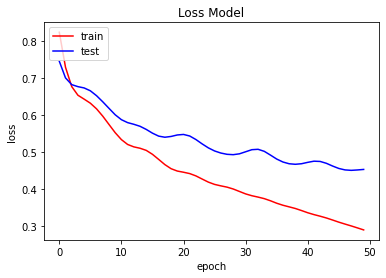

In [ ]:
plt.plot(history.history['loss'], color='red')
plt.plot(history.history['val_loss'], color='blue')
plt.title('Loss Model')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Predict

In [ ]:
predictions = model.predict(X_validate)
predictions

array([[0.93016356],
       [0.53568363],
       [0.8582075 ],
       [0.26150733],
       [0.8456805 ],
       [0.673748  ],
       [0.8421217 ],
       [0.73492825],
       [0.43114066],
       [0.65331924],
       [0.02207902],
       [0.7891156 ],
       [0.37664497],
       [0.14772958],
       [0.84799314],
       [0.643829  ],
       [0.9683025 ],
       [0.4601799 ],
       [0.60232115],
       [0.93380123],
       [0.51174223],
       [0.89459264],
       [0.07253379],
       [0.00438455],
       [0.31669304],
       [0.20689109],
       [0.62749255],
       [0.9548264 ],
       [0.5853788 ],
       [0.3181194 ],
       [0.23982432],
       [0.9562223 ],
       [0.00901243],
       [0.00798571],
       [0.37082225],
       [0.07822698],
       [0.9172421 ],
       [0.9474571 ],
       [0.526691  ],
       [0.07607147],
       [0.1712564 ],
       [0.87164116],
       [0.81201655],
       [0.17211407],
       [0.5572712 ],
       [0.6837554 ],
       [0.68415344],
       [0.068

In [ ]:
y_pred = np.where(predictions < 0.5, 0, 1)
y_pred

array([[1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0]])

In [ ]:
y_validate

,Prediction_status
116,1
23,1
149,1
67,0
37,1
58,1
33,1
20,1
8,0
88,0


In [ ]:
accuracy_score(y_validate, y_pred)

0.7708333333333334

In [ ]:
y_pred

array([[1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0]])

In [ ]:
for i in range(len(y_pred)):
    if((y_pred[i])>0.5):
        print('Butuh Penaganan')
    else:
        print('Tidak Butuh Penaganan')

Butuh Penaganan
Butuh Penaganan
Butuh Penaganan
Tidak Butuh Penaganan
Butuh Penaganan
Butuh Penaganan
Butuh Penaganan
Butuh Penaganan
Tidak Butuh Penaganan
Butuh Penaganan
Tidak Butuh Penaganan
Butuh Penaganan
Tidak Butuh Penaganan
Tidak Butuh Penaganan
Butuh Penaganan
Butuh Penaganan
Butuh Penaganan
Tidak Butuh Penaganan
Butuh Penaganan
Butuh Penaganan
Butuh Penaganan
Butuh Penaganan
Tidak Butuh Penaganan
Tidak Butuh Penaganan
Tidak Butuh Penaganan
Tidak Butuh Penaganan
Butuh Penaganan
Butuh Penaganan
Butuh Penaganan
Tidak Butuh Penaganan
Tidak Butuh Penaganan
Butuh Penaganan
Tidak Butuh Penaganan
Tidak Butuh Penaganan
Tidak Butuh Penaganan
Tidak Butuh Penaganan
Butuh Penaganan
Butuh Penaganan
Butuh Penaganan
Tidak Butuh Penaganan
Tidak Butuh Penaganan
Butuh Penaganan
Butuh Penaganan
Tidak Butuh Penaganan
Butuh Penaganan
Butuh Penaganan
Butuh Penaganan
Tidak Butuh Penaganan


Akurasi: 0.7708333333333334


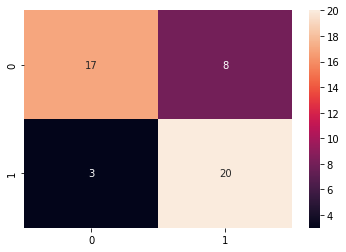

In [ ]:
accuration = accuracy_score(y_validate, y_pred)
print('Akurasi:', accuration)
matrix = confusion_matrix(y_validate, y_pred)
sns.heatmap(matrix,annot=True,fmt='d')

In [ ]:
matrix = np.array(confusion_matrix(y_validate, y_pred, labels=[1,0])) # diprediksi butu-1, diprediksi tidak butuh-0
conf_mat = pd.DataFrame(matrix, index=['diprediksi butuh', 'diprediksi tidak butuh'],
                         columns=['Butuh Pertolongan', 'Tidak Butuh Pertolongan'])
conf_mat

,Butuh Pertolongan,Tidak Butuh Pertolongan
diprediksi butuh,20,3
diprediksi tidak butuh,8,17


In [ ]:
print('Accuration',classification_report(y_validate, y_pred))

Accuration               precision    recall  f1-score   support

           0       0.85      0.68      0.76        25
           1       0.71      0.87      0.78        23

    accuracy                           0.77        48
   macro avg       0.78      0.77      0.77        48
weighted avg       0.78      0.77      0.77        48



In [ ]:
features.head(5)

,Gender,Are you above 30 years of age?,How are you feeling today?,Is your sadness momentarily or has it been constant for a long time?,At what time of the day are you extremely low?,How frequently have you had little pleasure or interest in the activities you usually enjoy?,How confident you have been feeling in your capabilities recently.,"Describe how ‘supported’ you feel by others around you – your friends, family, or otherwise.",How frequently have you been doing things that mean something to you or your life?,How easy is it for you to take medical leave for a mental health condition?,"How often do you make use of substance abuse(e.g. smoking, alcohol)?","How many hours do you spend per day on watching mobile phone, laptop, computer, television, etc.?","If sad, how likely are you to take an appointment with a psychologist or a counsellor for your current mental state?",How often do you get offended or angry or start crying ?,How likely do you feel yourself vulnerable or lonely?,How comfortable are you in talking about your mental health?
0,1,0,1,1,2,3,4,0,2,2,0,1,1,1,4,5
1,0,0,1,1,0,1,2,2,2,2,0,1,1,1,4,5
2,0,0,1,2,2,0,2,2,3,0,0,3,1,1,2,5
3,1,0,1,2,2,1,2,1,2,2,0,1,1,2,4,5
4,1,0,0,0,1,3,3,1,1,2,0,2,1,1,4,5


Save

In [ ]:
import tempfile
MODEL_DIR = tempfile.gettempdir()

version = 1

export_path = os.path.join(MODEL_DIR, str(version))

if os.path.isdir(export_path):
    print('\nAlready saved a model, cleaning up\n')
    !rm -r {export_path}

model.save(export_path, save_format="tf")

print('\nexport_path = {}'.format(export_path))
!ls -l {export_path}

INFO:tensorflow:Assets written to: /tmp/1/assets

export_path = /tmp/1
total 124
drwxr-xr-x 2 root root   4096 Jun 11 13:48 assets
-rw-r--r-- 1 root root  10210 Jun 11 13:48 keras_metadata.pb
-rw-r--r-- 1 root root 104005 Jun 11 13:48 saved_model.pb
drwxr-xr-x 2 root root   4096 Jun 11 13:48 variables


In [ ]:
# Intialize the TFLite converter to load the SavedModel
converter = tf.lite.TFLiteConverter.from_saved_model(export_path)

# Set the optimization strategy for 'size' in the converter 
converter.optimizations = [tf.lite.Optimize.OPTIMIZE_FOR_SIZE]

# Use the tool to finally convert the model
tflite_model = converter.convert()

# Write TFLite model
tflite_model_file = 'mental-health-03.tflite'

with open(tflite_model_file, "wb") as f:
    f.write(tflite_model)

with open('mental-health-labels-03', 'w') as f:
    f.write('\n'.join(label_types))

In [ ]:
print(features.shape)

(158, 16)


In [ ]:
try:
    files.download('mental-health-03.tflite')
    files.download('mental-health-labels-03.txt')
except:
    pass

In [ ]:
model.save("mental-health-03.h5")

###Save Model to PKL

In [ ]:
import pickle

pickle.dump(model, open('mental-health-03.pkl', 'wb'))

INFO:tensorflow:Assets written to: ram://28925ab8-61e1-4f97-8168-fef7e7d7090b/assets


INFO:tensorflow:Assets written to: ram://28925ab8-61e1-4f97-8168-fef7e7d7090b/assets


load model


In [ ]:
pickled_model = pickle.load(open('mental-health-03.pkl', 'rb'))

In [ ]:
import joblib

In [ ]:
joblib.dump(model, 'mental-health')

INFO:tensorflow:Assets written to: ram://2f821983-fb82-4f18-9368-505b7d8e81ff/assets


INFO:tensorflow:Assets written to: ram://2f821983-fb82-4f18-9368-505b7d8e81ff/assets


['mental-health']